In [6]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [7]:
# Create list of all targets (minus background noise)
dataset_path = './recording'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['backgroundNoise', 'ㄏㄧㄡ', 'ㄟ', '吼', '啦', '嗯', '的一個', '的這個', '的那個', '著', '那', '那那個', '阿']


In [8]:
# Settings
feature_sets_path = './'
feature_sets_filename = './appendEnergyT.npz'
#model_filename = 'wake_word_stop_model.h5'
#wake_word = '嗯'

In [9]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [10]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[ 8.  7. 11. 11.  8.  8.  5.  1.  6.  5.  9.  3.  2.  2.  7. 11.  4.  0.
  9.  9.  8.  0.  5.  3.  4.  2.  8. 12.  0. 11.  1.  8.  8. 12.  0.  7.
  2.  0.  7.  3.  6.  4.  0.  3.  5.  3.  6. 12. 12.  4.  9. 11.]
[10. 10.  0.  3.  8.  6.  4.  9. 12.  7.  2.  8.  1. 10. 10. 11.  7.  7.
  8.  3.  4.  5.  9. 12.  4.  5.  2.  7.  8.  2.  1.  6.  0.  4.  0. 11.
  5.  9.  8.  2.  6.  6.  2.  4.  8.  6.  3. 12.  9.  7.  8.  0.  6.  6.
  4.  2.  6.  2.  8.  0.  2. 10.  3.  1. 10.  1.  6.  6. 11.  2. 11.  4.
 10.  9.  9. 12.  9.  2.  4. 11.  1.  4. 11.  2. 10. 11.  2. 11. 10.  0.
 10.  9.  3. 12.  2.  6.  3. 11. 12.  3.  3. 12.  3.  5.  6.  7.  4.  4.
 12.  7.  7.  1. 11. 10.  4. 12. 12. 12. 11.  3.  8. 10.  4.  7. 12. 12.
  6.  1.  9. 10.  2.  8. 10. 11.  5.  2.  1.  5.  7.  9. 12.  9.  8. 10.
  8.  1.  7. 12.  4. 10.  2.  4.  3. 12.  7.  9.  8.  1.  7.  4. 11.  2.
  0.  4.  4.  5. 10.  5. 12.  7.  7. 12. 10.  5.  1.  3.  2.  4.  9.  7.
  5.  2.  9. 11.  6.  2.  1.  1.  8.  0.  2. 11. 11.  5.  

In [11]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(416, 23, 16)
(52, 23, 16)
(52, 23, 16)


In [12]:
# Peek at labels
print(y_val)

[11. 12. 12.  8.  0.  1.  2.  8.  0.  1.  0.  8.  2.  0.  1.  9.  5.  7.
  6. 10.  4.  9.  6.  4. 11.  5. 11.  8.  5. 11.  3. 12.  9.  0. 10.  0.
  7.  3. 12. 10.  2.  9.  8.  8.  5.  8.  7.  4.  5.  6.  2.  1.]


In [13]:
# Peek at labels after conversion
print(y_test)

[ 8.  7. 11. 11.  8.  8.  5.  1.  6.  5.  9.  3.  2.  2.  7. 11.  4.  0.
  9.  9.  8.  0.  5.  3.  4.  2.  8. 12.  0. 11.  1.  8.  8. 12.  0.  7.
  2.  0.  7.  3.  6.  4.  0.  3.  5.  3.  6. 12. 12.  4.  9. 11.]


In [14]:
# View the dimensions of our input data
print(x_train.shape)

(416, 23, 16)


In [15]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(416, 23, 16, 1)
(52, 23, 16, 1)
(52, 23, 16, 1)


In [16]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(23, 16, 1)


In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model.add(layers.Conv2D(32, (2, 2), activation='relu'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))#64
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))#64
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))
# Display model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 15, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 7, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 64)         8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 3, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 960)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [18]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',    #'optimizers.Adam(lr=0.0005)'
              metrics=['acc'])

In [19]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=150,#150
                    batch_size=50,#25
                    validation_data=(x_val, y_val))

Epoch 1/150
9/9 [==============================] - 6s 45ms/step - loss: 2.7317 - acc: 0.1082 - val_loss: 2.5168 - val_acc: 0.0962
Epoch 2/150
9/9 [==============================] - 0s 8ms/step - loss: 2.5609 - acc: 0.1010 - val_loss: 2.4863 - val_acc: 0.1346
Epoch 3/150
9/9 [==============================] - 0s 10ms/step - loss: 2.4670 - acc: 0.1779 - val_loss: 2.4251 - val_acc: 0.2115
Epoch 4/150
9/9 [==============================] - 0s 10ms/step - loss: 2.4225 - acc: 0.1587 - val_loss: 2.3457 - val_acc: 0.3077
Epoch 5/150
9/9 [==============================] - 0s 10ms/step - loss: 2.3791 - acc: 0.1875 - val_loss: 2.2577 - val_acc: 0.2885
Epoch 6/150
9/9 [==============================] - 0s 10ms/step - loss: 2.3005 - acc: 0.2019 - val_loss: 2.1496 - val_acc: 0.3846
Epoch 7/150
9/9 [==============================] - 0s 10ms/step - loss: 2.2326 - acc: 0.2380 - val_loss: 2.0253 - val_acc: 0.4231
Epoch 8/150
9/9 [==============================] - 0s 9ms/step - loss: 2.1087 - acc: 0.2885

Epoch 64/150
9/9 [==============================] - 0s 9ms/step - loss: 0.3821 - acc: 0.8582 - val_loss: 0.2677 - val_acc: 0.9231
Epoch 65/150
9/9 [==============================] - 0s 10ms/step - loss: 0.4238 - acc: 0.8389 - val_loss: 0.2545 - val_acc: 0.9231
Epoch 66/150
9/9 [==============================] - 0s 10ms/step - loss: 0.3890 - acc: 0.8486 - val_loss: 0.2718 - val_acc: 0.9038
Epoch 67/150
9/9 [==============================] - 0s 10ms/step - loss: 0.3640 - acc: 0.8726 - val_loss: 0.2677 - val_acc: 0.8846
Epoch 68/150
9/9 [==============================] - 0s 10ms/step - loss: 0.3431 - acc: 0.8870 - val_loss: 0.2363 - val_acc: 0.9038
Epoch 69/150
9/9 [==============================] - 0s 7ms/step - loss: 0.3618 - acc: 0.8702 - val_loss: 0.2469 - val_acc: 0.9231
Epoch 70/150
9/9 [==============================] - 0s 11ms/step - loss: 0.3606 - acc: 0.8846 - val_loss: 0.2594 - val_acc: 0.9231
Epoch 71/150
9/9 [==============================] - 0s 10ms/step - loss: 0.3580 - acc

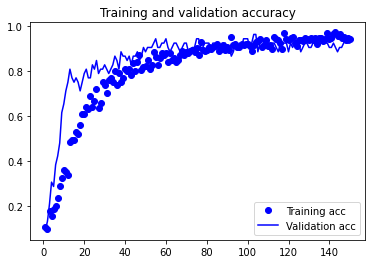

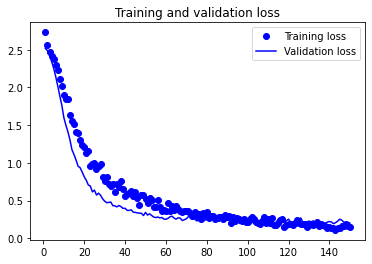

In [20]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# Save the model as a file
models.save_model(model, './h5/appendEnergyTT.h5')

In [22]:
# TEST: Load model and run it against test set
model = models.load_model('./h5/appendEnergyTT.h5')
for i in range(0, 10):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 8.0  Prediction: [[5.12046499e-05 7.09644938e-03 1.46631207e-02 1.11021276e-04
  1.56705361e-03 8.74327898e-01 1.15204873e-02 1.16113639e-02
  9.56894772e-04 7.30459690e-02 2.41959006e-05 1.90848310e-03
  3.11587285e-03]]
Answer: 7.0  Prediction: [[8.4251351e-06 2.9978999e-05 3.8166292e-04 1.9979718e-06 6.2960689e-06
  2.2287990e-03 2.0339830e-04 9.1454738e-01 3.0560227e-02 4.6107965e-05
  5.1604188e-04 5.1422223e-02 4.7535490e-05]]
Answer: 11.0  Prediction: [[1.5687398e-03 9.9111712e-05 4.5970445e-03 6.6693347e-06 6.0410186e-04
  1.8327418e-04 3.1672468e-04 5.5597357e-02 2.2769104e-01 2.4068914e-04
  2.1654816e-02 6.8629253e-01 1.1479375e-03]]
Answer: 11.0  Prediction: [[1.16342380e-06 1.66550126e-06 2.89501932e-05 9.74940758e-06
  3.89711386e-06 1.42601159e-04 1.85233774e-04 4.07257900e-02
  1.59038797e-01 3.29720365e-07 3.05565802e-04 7.99454093e-01
  1.02137405e-04]]
Answer: 8.0  Prediction: [[1.6014006e-04 4.7306807e-04 1.1083257e-01 1.8507255e-04 2.1363414e-04
  2.1277722

In [23]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

2/2 [==============================] - 0s 44ms/step - loss: 0.2711 - acc: 0.9615


[0.27105382084846497, 0.9615384340286255]